Apriori Algorithm

It is used to generate association rules.
It is widely used for market basket analysis to find what products are usually bought together to give recommendations.

Association rule involves indentifying items or attributes that occur together in a table.

A set of items together is called an itemset. If any itemset has k-items it is called a k-itemset. An itemset consists of two or more items. An itemset that occurs frequently is called a frequent itemset.

Frequent Item set - A set of items is called frequent if it satisfies a minimum threshold value for support and confidence.

Frequent Pattern Mining - discover relationships between items in a dataset.

Association rule is defined as; 'Let I= { …} be a set of ‘n’ binary attributes called items. Let D= { ….} be set of transaction called database. Each transaction in D has a unique transaction ID and contains a subset of the items in I. A rule is defined as an implication of form X->Y where X, Y? I and X?Y=?. The set of items X and Y are called antecedent and consequent of the rule respectively'

Support(A) = Number of Transactions in which A appears / Total number of transactions.

Confidence(B/A) = Support (A U B) / Support(B)

Lift is the ratio of the sale of A when you sell B

The support parameter is used to define the minimum threshold, which represents the minimum number of times an itemset must appear in the dataset to be considered "frequent."

It then does support counting to count the occurence of the candidate item set. 

Pruning is a process where the algorithm eliminates k-itemsets that do not meet the minimum support threshold.

The association rule is what creates the support and confidence attribute.

The confidence parameter is a conditional probability. 


Example.



Abstract

Using a groceries data set I will 

In [176]:
!pip install apyori

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df=pd.read_csv('D:\Downloads\Groceries_dataset.csv\Groceries_dataset.csv')


df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [179]:
df.set_index("Date",inplace = True)
df.index=pd.to_datetime(df.index, infer_datetime_format=True)

In [180]:
df.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk


In [181]:
totalItems = len(df)
totalDays = len(np.unique(df.index.date))
totalMonths = len(np.unique(df.index.year))

print(totalItems, totalDays, totalMonths)

38765 728 2


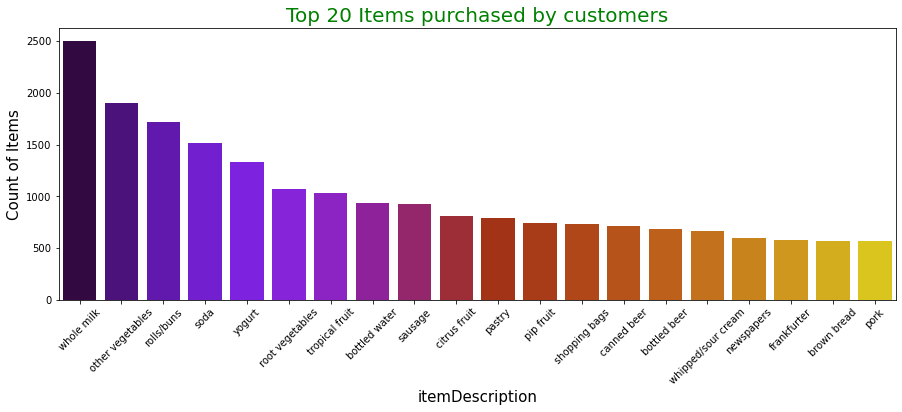

In [182]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [183]:
#now we group the dataset to form a list of products that was bought by the same customer on the same date to see what they had in their basket

df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))
df.head()


Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
Name: itemDescription, dtype: object

In [184]:
transactions = df.values.tolist()
transactions[:10]


[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [185]:
from apyori import apriori
rules = apriori(transactions, min_support=0.00030, min_confidence = 0.1,min_lift = 2,min_length = 2)

results = list(rules)
results

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'brandy', 'whole milk'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'butter', 'sweet spreads'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

In [186]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [187]:
ordered_results


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,whipped/sour cream,yogurt,0.000601,0.204545,2.381800
100,sausage,yogurt,0.000401,0.206897,2.409178
101,yogurt,sausage,0.001470,0.131737,2.182917
102,pastry,soda,0.000334,0.090909,7.817659


In [191]:
ordered_results = ordered_results.sort_values(by=['Confidence'], ascending=False)
num_items = len(ordered_results)

ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
48,hygiene articles,whole milk,0.000401,0.545455,3.453930
63,curd,sausage,0.000334,0.500000,8.285161
76,pip fruit,rolls/buns,0.000334,0.500000,4.545261
37,hard cheese,whole milk,0.000334,0.454545,2.878275
44,butter milk,yogurt,0.000334,0.416667,4.851816
...,...,...,...,...,...
19,mustard,white bread,0.000334,0.054348,2.265199
8,condensed milk,waffles,0.000334,0.051020,2.756023
1,condensed milk,berries,0.000334,0.051020,2.341774
18,spread cheese,misc. beverages,0.000334,0.050000,3.170127


In [189]:
import matplotlib.cm as cm

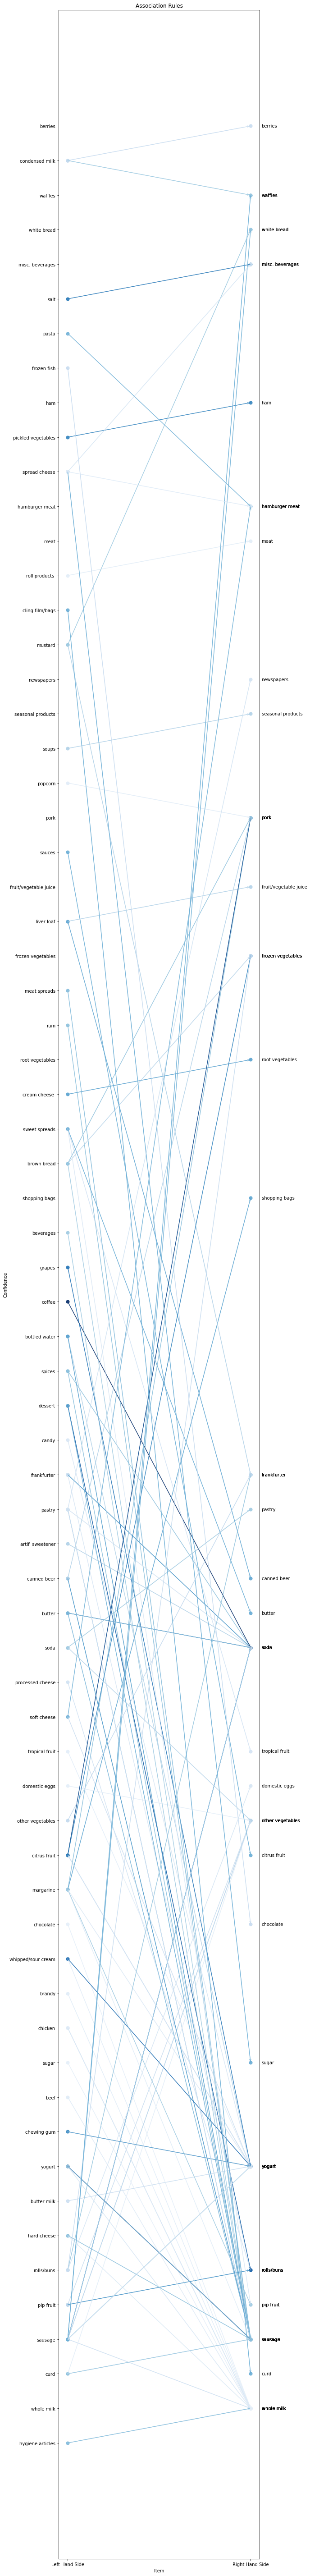

In [195]:
color_map = cm.get_cmap('Blues')

normalized_confidence = ordered_results['Confidence'] / ordered_results['Confidence'].max()

# Create the parallel coordinates plot
plt.figure(figsize=(8, num_items))

# Plot the lines for each association rule
for i, (lhs, rhs, confidence) in enumerate(ordered_results[['Left Hand Side', 'Right Hand Side', 'Confidence']].itertuples(index=False)):
    color = color_map(normalized_confidence[i])
    plt.plot([0, 1], [lhs, rhs], c=color, alpha=0.7)

# Add scatter points for each item with shading and arrows
for i, (lhs, rhs, confidence) in enumerate(ordered_results[['Left Hand Side', 'Right Hand Side', 'Confidence']].itertuples(index=False)):
    color = color_map(normalized_confidence[i])
    plt.scatter([0, 1], [lhs, rhs], c=[color], s=50, alpha=0.9)
    plt.annotate("", xy=(1, rhs), xytext=(0, lhs),
                 arrowprops=dict(arrowstyle="->", color=color, alpha=0.7))
    plt.text(1.06, rhs, rhs, ha='left', va='center')

# Set axis labels and title
plt.xticks([0, 1], ['Left Hand Side', 'Right Hand Side'])
plt.xlabel('Item')
plt.ylabel('Confidence')
plt.title('Association Rules')

# Show the plot
plt.show()

#note: h index